# 1. Simply read a CSV using Pandas

In [1]:
import os 
cwd = os.getcwd()
cwd

'/home/jovyan/notebooks'

In [40]:
import pandas as pd
pd_dataframe = pd.read_csv("../data/breweries.csv")
pd_dataframe

,Unnamed: 0,name,city,state,id
0,0,NorthGate Brewing,Minneapolis,MN,0
1,1,Against the Grain Brewery,Louisville,KY,1
2,2,Jack's Abby Craft Lagers,Framingham,MA,2
3,3,Mike Hess Brewing Company,San Diego,CA,3
4,4,Fort Point Beer Company,San Francisco,CA,4
...,...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA,553
554,554,Dave's Brewfarm,Wilson,WI,554
555,555,Ukiah Brewing Company,Ukiah,CA,555
556,556,Butternuts Beer and Ale,Garrattsville,NY,556


# 2. Check Data Integrity Examples

In [52]:
def check_city(df: pd.DataFrame):
    # get specific cols df
    '''
    :param df: input dataframe 
    :param specific_cols: list of columns names
    :return: ouput dataframe
    '''
    df['city'] = df['city'].astype('str')
    correct_mask = df['city'].str.len() < 15
    wrong_mask = df['city'].str.len() >= 15
    return df.loc[correct_mask], df.loc[wrong_mask]

def check_state(df: pd.DataFrame):
    # get specific cols df
    '''
    :param df: input dataframe 
    :param specific_cols: list of columns names
    :return: ouput dataframe
    '''
    df['state'] = df['state'].astype('str')
    df['state'] = df['state'].str.strip()
    correct_mask = df['state'].str.len() == 2
    wrong_mask = df['state'].str.len() != 2
    return df.loc[correct_mask], df.loc[wrong_mask]

def func1(x):
    firstName=x.firstname
    lastName=x.lastName
    name=firstName+","+lastName
    gender=x.gender.lower()
    salary=x.salary*2
    return (name,gender,salary)

In [53]:
pd_dataframe, pd_scarti_city = check_city(pd_dataframe)
pd_dataframe, pd_scarti_state = check_state(pd_dataframe)

In [54]:
pd_dataframe.head(5)

,Unnamed: 0,name,city,state,id
3,3,Mike Hess Brewing Company,San Diego,CA,3
6,6,Great Divide Brewing Company,Denver,CO,6
7,7,Tapistry Brewing,Bridgman,MI,7
8,8,Big Lake Brewing,Holland,MI,8
11,11,Petoskey Brewing,Petoskey,MI,11


In [55]:
pd_scarti_city.head(5)

,Unnamed: 0,name,city,state,id


In [56]:
pd_scarti_state.head(5)

,Unnamed: 0,name,city,state,id


# 3. Load Data Into DataLake (HDFS)

In [57]:
!pip install hdfs

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=3a63ca6facf65125ffea5002045ce7ce9ad35d502de757ebc995f4afc5da514e
  Stored in directory: /home/jovyan/.cache/pip/wheels/7c/d7/8d/2156234738063e3d4a39ba77dc677046100e62766b53807189
Successfully built docopt


In [61]:
from hdfs import InsecureClient
client = InsecureClient('http://namenode:9870', user='root')

with client.write('/data/openbeer/breweries/breweries_from_pandas.csv', encoding = 'utf-8') as writer:
  pd_dataframe.to_csv(writer)

# 5. Read Data from HDFS using PySpark

We need to recover the right spark session url connecting to http://localhost:8080

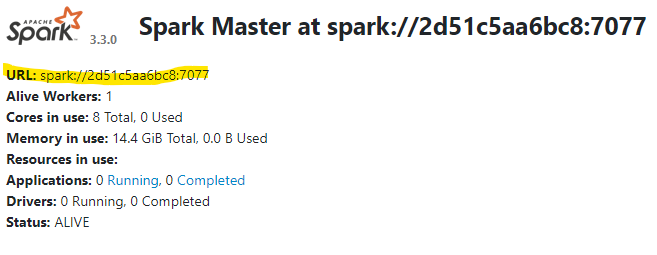

In [62]:
SPARK_MASTER_URL="spark://de2ac0870b40:7077"

In [63]:
from pyspark.sql import SparkSession

spark = SparkSession.\
        builder.\
        appName("pyspark-notebook").\
        master(SPARK_MASTER_URL).\
        config("spark.executor.memory", "512m").\
        config("spark.authenticate", "false").\
        getOrCreate()

In [68]:
spark_dataframe=spark.read.csv("hdfs://namenode:9000/data/openbeer/breweries/breweries_from_pandas.csv", header=True)
spark_dataframe.show(5)

+---+----------+--------------------+---------+-----+---+
|_c0|Unnamed: 0|                name|     city|state| id|
+---+----------+--------------------+---------+-----+---+
|  3|         3|Mike Hess Brewing...|San Diego|   CA|  3|
|  6|         6|Great Divide Brew...|   Denver|   CO|  6|
|  7|         7|    Tapistry Brewing| Bridgman|   MI|  7|
|  8|         8|    Big Lake Brewing|  Holland|   MI|  8|
| 11|        11|    Petoskey Brewing| Petoskey|   MI| 11|
+---+----------+--------------------+---------+-----+---+
only showing top 5 rows

